In [15]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
#! pip install statmodels
import statsmodels.api as sm

# ワーニングを表示させない
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 普通にデータを読み込む
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html
dataNormal = pd.read_csv('AirPassengers.csv')
dataNormal.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# 日付形式で読み込む（dtype=floatで読み込まないと、あとでARIMAモデル推定時にエラーとなる）
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data_old_method = pd.read_csv('AirPassengers.csv', index_col='Month', date_parser=dateparse, dtype='float')
data_old_method.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [4]:
# 2018年7月7日追記
# 以下のコードの方が読み込みは簡単
data = pd.read_csv('AirPassengers.csv', 
                      index_col='Month', 
                      parse_dates=True, 
                      dtype='float')
data.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [5]:
# 日付形式にする
ts = data['#Passengers'] 
ts.head()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64

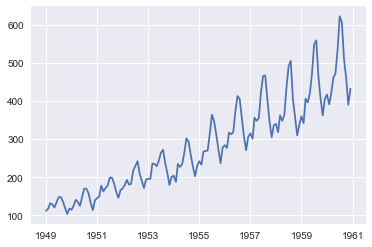

In [6]:
# プロット
plt.plot(ts)

In [7]:
# データの取得方法その1
ts['1949-01-01']

112.0

In [8]:
# データの取得方法その2
from datetime import datetime
ts[datetime(1949,1, 1)]

112.0

In [9]:
# シフト
ts.shift().head()

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
Name: #Passengers, dtype: float64

In [10]:
# 差分系列
diff = ts - ts.shift()
diff.head()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: #Passengers, dtype: float64

In [11]:
# 2018年7月7日追記
# こちらの方が簡単
ts.diff().head()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: #Passengers, dtype: float64

In [12]:
# 対数差分系列
logDiff = np.log(ts) - np.log(ts.shift())

# NaNを取り除てから表示
logDiff.dropna().head()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Name: #Passengers, dtype: float64

In [13]:
# 自己相関を求める
ts_acf = sm.tsa.stattools.acf(ts, nlags=40)
ts_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [14]:
# 偏自己相関
ts_pacf = sm.tsa.stattools.pacf(ts, nlags=40, method='ols')
ts_pacf

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

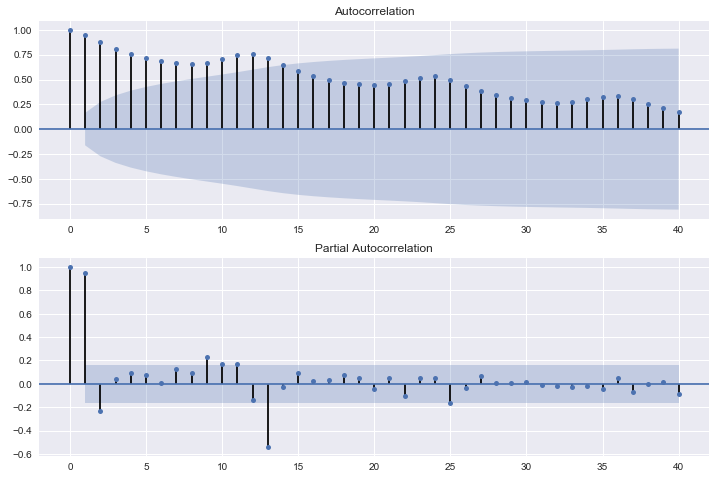

In [37]:
#  自己相関のグラフ
#plt.subplot(行数, 列数, 何番目のプロットか)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2)

In [17]:
# たぶん和分過程なので、差分をとる
diff = ts - ts.shift()
diff = diff.dropna()
diff.head()

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: #Passengers, dtype: float64

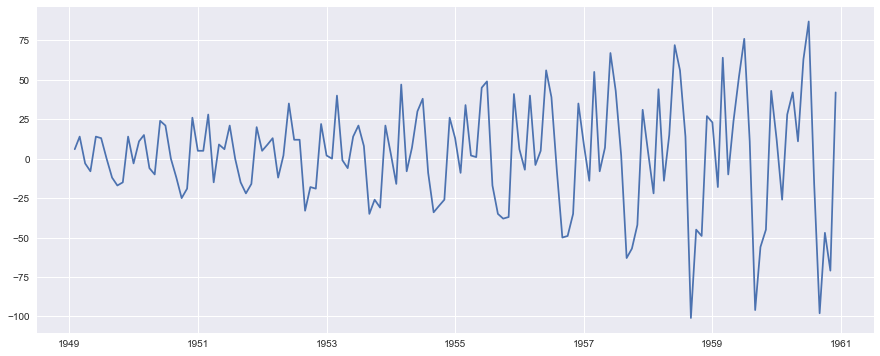

In [18]:
# 差分系列のグラフ
plt.plot(diff)

In [19]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
resDiff

{'aic':              0            1            2
 0          NaN  1397.257791  1397.093436
 1  1401.852641  1412.615224  1385.496795
 2  1396.587654  1378.338024  1353.175687
 3  1395.021214  1379.614000  1351.138688
 4  1388.216680  1379.616584  1373.560615, 'aic_min_order': (3, 2)}

In [20]:
# P-3, q=2 が最善となったので、それをモデル化
from statsmodels.tsa.arima_model import ARIMA
ARIMA_3_1_2 = ARIMA(ts, order=(3, 1, 2)).fit(dist=False)
ARIMA_3_1_2.params

const                  2.673500
ar.L1.D.#Passengers    0.261991
ar.L2.D.#Passengers    0.367828
ar.L3.D.#Passengers   -0.363473
ma.L1.D.#Passengers   -0.075035
ma.L2.D.#Passengers   -0.924834
dtype: float64

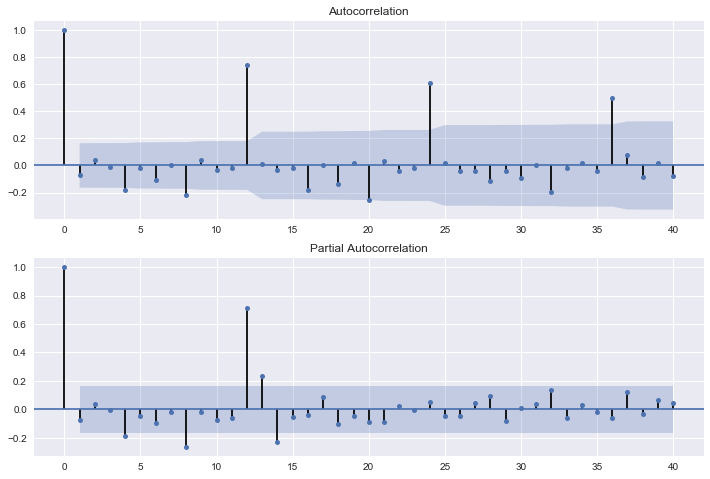

In [21]:
# 残差のチェック
# SARIMAじゃないので、周期性が残ってしまっている。。。
resid = ARIMA_3_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [22]:
# SARIMAモデルを「決め打ち」で推定する
import statsmodels.api as sm

SARIMA_3_1_2_111 = sm.tsa.SARIMAX(ts, order=(3,1,2), seasonal_order=(1,1,1,12)).fit(method='bfgs', maxiter=300)
print(SARIMA_3_1_2_111.summary())

         Current function value: 3.511414
         Iterations: 7
         Function evaluations: 59
         Gradient evaluations: 47
                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -505.644
Date:                            Mon, 11 Feb 2019   AIC                           1027.287
Time:                                    21:43:00   BIC                           1051.046
Sample:                                01-01-1949   HQIC                          1036.941
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

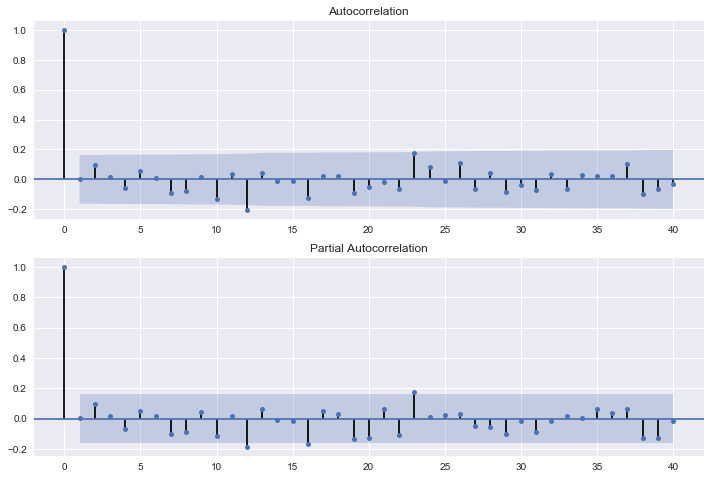

In [23]:
# 残差のチェック
residSARIMA = SARIMA_3_1_2_111.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

In [24]:
# 予測
pred = SARIMA_3_1_2_111.predict('1960-01-01', '1961-12-01')
print(pred)

1960-01-01    420.364131
1960-02-01    398.838840
1960-03-01    453.338125
1960-04-01    420.523949
1960-05-01    472.223706
1960-06-01    529.449243
1960-07-01    602.833858
1960-08-01    626.121889
1960-09-01    513.956313
1960-10-01    453.777408
1960-11-01    415.123863
1960-12-01    440.413298
1961-01-01    448.989212
1961-02-01    427.307245
1961-03-01    461.384314
1961-04-01    497.595829
1961-05-01    510.265920
1961-06-01    571.708245
1961-07-01    657.388219
1961-08-01    644.623095
1961-09-01    546.890641
1961-10-01    498.720577
1961-11-01    430.927496
1961-12-01    473.146432
Freq: MS, dtype: float64


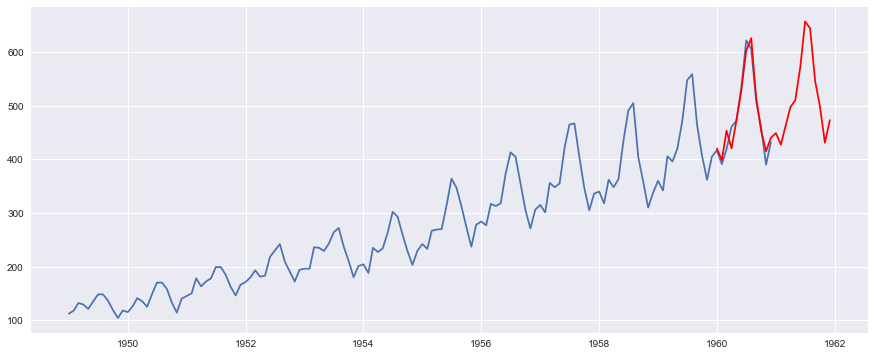

In [25]:
# 実データと予測結果の図示
plt.plot(ts)
plt.plot(pred, "r")

In [26]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern

192

In [27]:
# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit(method='bfgs', maxiter=300, disp=False)
                        modelSelection.ix[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.ix[num]["aic"] = sarima.aic
                        num = num + 1


In [28]:
modelSelection

,model,aic
0,"order=(1,0,0), season=(0,0,0)",1415.91
1,"order=(1,0,0), season=(0,0,1)",1205.39
2,"order=(1,0,0), season=(0,1,0)",1029.98
3,"order=(1,0,0), season=(0,1,1)",944.385
4,"order=(1,0,0), season=(1,0,0)",1017.32
5,"order=(1,0,0), season=(1,0,1)",1007.03
6,"order=(1,0,0), season=(1,1,0)",944.044
7,"order=(1,0,0), season=(1,1,1)",945.44
8,"order=(1,0,1), season=(0,0,0)",1390.45
9,"order=(1,0,1), season=(0,0,1)",1192.29


In [29]:
# AIC最小モデル
modelSelection[modelSelection.aic == min(modelSelection.aic)]

,model,aic
187,"order=(3,1,3), season=(0,1,1)",898.105


In [30]:
# 参考：次数がすべて０だとエラーになる 
# sarima = sm.tsa.SARIMAX(ts, order=(0,0,0), seasonal_order=(0,0,0,12), enforce_stationarity = False).fit()

In [31]:
bestSARIMA = sm.tsa.SARIMAX(ts, order=(3,1,3), seasonal_order=(0,1,1,12), enforce_stationarity = False, enforce_invertibility = False).fit()

In [32]:
print(bestSARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(0, 1, 1, 12)   Log Likelihood                -441.052
Date:                            Mon, 11 Feb 2019   AIC                            898.105
Time:                                    21:46:04   BIC                            921.863
Sample:                                01-01-1949   HQIC                           907.759
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2231      0.097     -2.302      0.021      -0.413      -0.033
ar.L2         -0.1642      0.108   

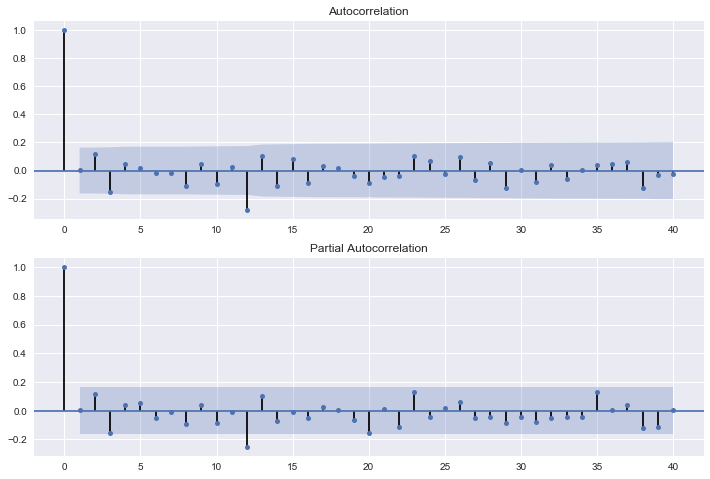

In [33]:
# 残差のチェック
residSARIMA = bestSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

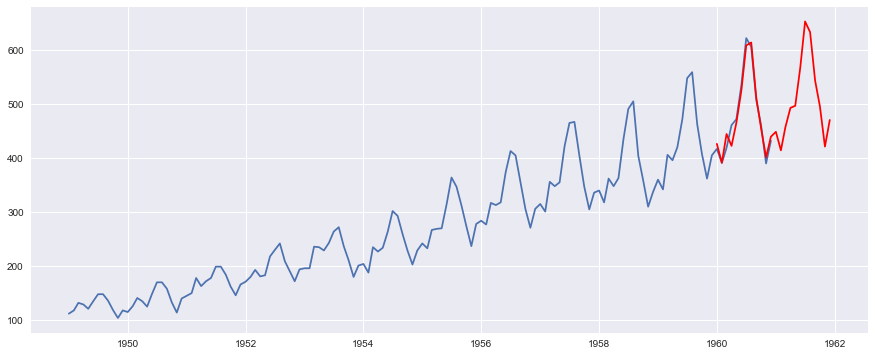

In [34]:
# 予測
bestPred = bestSARIMA.predict('1960-01-01', '1961-12-01')
# 実データと予測結果の図示
plt.plot(ts)
plt.plot(bestPred, "r")